# 1. 데이터(PUBG Finish Placement Prediction)
*   출처: https://www.kaggle.com/c/pubg-finish-placement-prediction/data

## 1-1. 데이터 불러오기

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

url = '/content/drive/MyDrive/codestates/p2/train_V2.csv'
df = pd.read_csv(url)

Mounted at /content/drive


In [2]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.shape

(4446966, 29)

In [4]:
df.isnull().sum()  #결측치 확인

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
df.duplicated().sum()  #중복된 row 확인

0

In [6]:
df = df.dropna(axis=0)
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64


## 1-2. column 설명

* **DBNOs** - 기절시킨 적 플레이어의 수
* **assists** - 이 플레이어가 피해를 입히고 팀 동료에 의해 사망한 플레이어의 수
* **boosts** - 사용한 부스팅 아이템의 수
* **damageDealt** - 팀킬 제외한 총 피해량
* **headshotKills** - 헤드샷으로 사망한 적 플레이어의 수
* **heals** - 사용한 치유 아이템의 수
* **Id** - 플레이어의 아이디
* **killPlace** - 이 매치의 킬 순위
* **killPoints** - 킬 수만의 외부 랭킹
* **killStreaks** - 단기간에 죽은 적의 최대 수
* **kills** - 죽인 적 플레이어의 수
* **longestKill** - 사망 시 사망한 플레이어와의 최장 거리
* **matchDuration** - 매치 시간
* **matchId** - 매치를 식별하는 아이디
* **matchType** - 게임모드를 식별(solo, duo, squad, solo-fpp, duo-fpp, squad-fpp 등)
* **rankPoints** - 플레이어의 Elo 랭킹
* **revives** - 팀원들을 소생시킨 횟수
* **rideDistance** - 차량으로 이동한 총 이동 거리(m 단위)
* **roadKills** - 차에 타고 있을 때의 킬 수
* **swimDistance** - 수영으로 이동한 총 이동거리(m 단위)
* **teamKills** - 팀원을 죽인 횟수
* **vehicleDestroys** - 차량은 파괴한 횟수
* **walkDistance** - 걸어서 이동한 총 이동 거리(m 단위)
* **weaponsAcquired** - 획득한 무기의 수
* **winPoints** - 순위로만 매겨진 랭킹
* **groupId** - 매치내 그룹을 식별하는 ID
* **numGroups** - 매치 안에 데이터가 있는 그룹의 수
* **maxPlace** - 매치 안에서의 제일 마지막 순위
* **winPlacePerc** - 예측의 타겟으로 순위 백분위 -> 상위 10%안에 들면 1, 상위 10%안에 들지 못하면 0)


---
* **totalDistance** - 총 이동 거리(m 단위)
* **headshotKillsPerkills** - 킬 중에서 헤드샷 킬의 비율(킬이 없으면 -1)
* **useCar** - 차를 사용했으면 1, 차를 사용하지 않았으면 0


# 2. 데이터 전처리

### 2-1. 매치 타입 별 데이터 수 확인 및 예측할 매치타입 결정

In [7]:
match_type = pd.DataFrame(df['matchType'].value_counts())
match_type.columns = ['count']
match_type

,count
squad-fpp,1756186
duo-fpp,996691
squad,626526
solo-fpp,536761
duo,313591
solo,181943
normal-squad-fpp,17174
crashfpp,6287
normal-duo-fpp,5489
flaretpp,2505


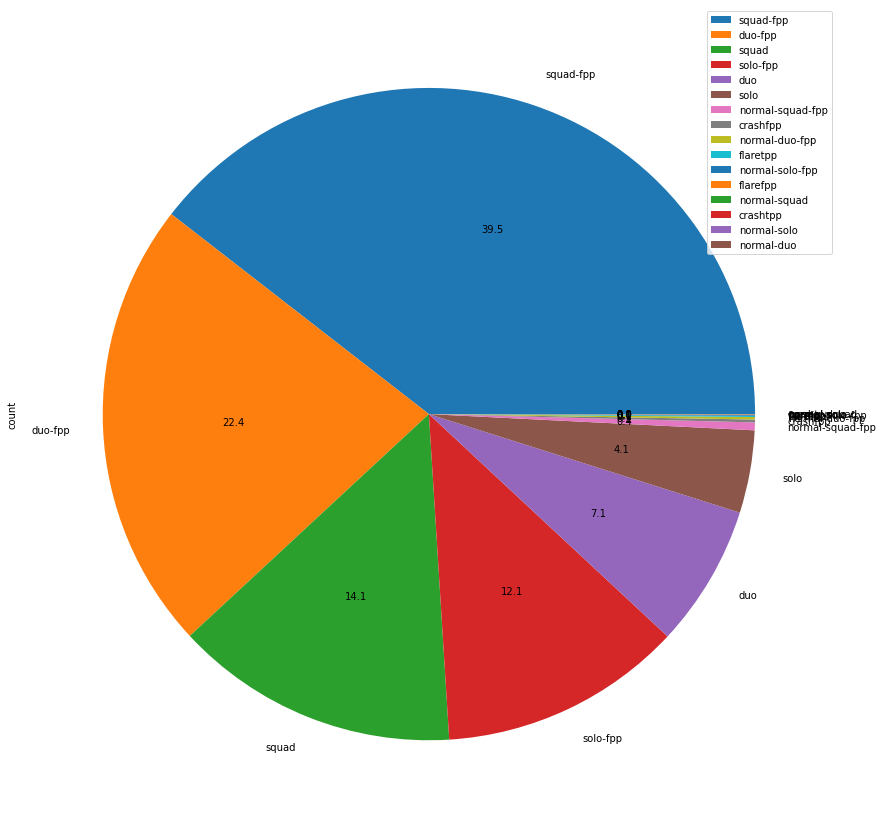

In [8]:
match_type.plot.pie(y='count', legend='True', autopct='%.1f', figsize=(15, 15));

In [9]:
match_type = match_type.drop(['normal-squad-fpp', 'crashfpp', 'normal-duo-fpp', 'flaretpp',
       'normal-solo-fpp', 'flarefpp', 'normal-squad', 'crashtpp',
       'normal-solo', 'normal-duo']) 

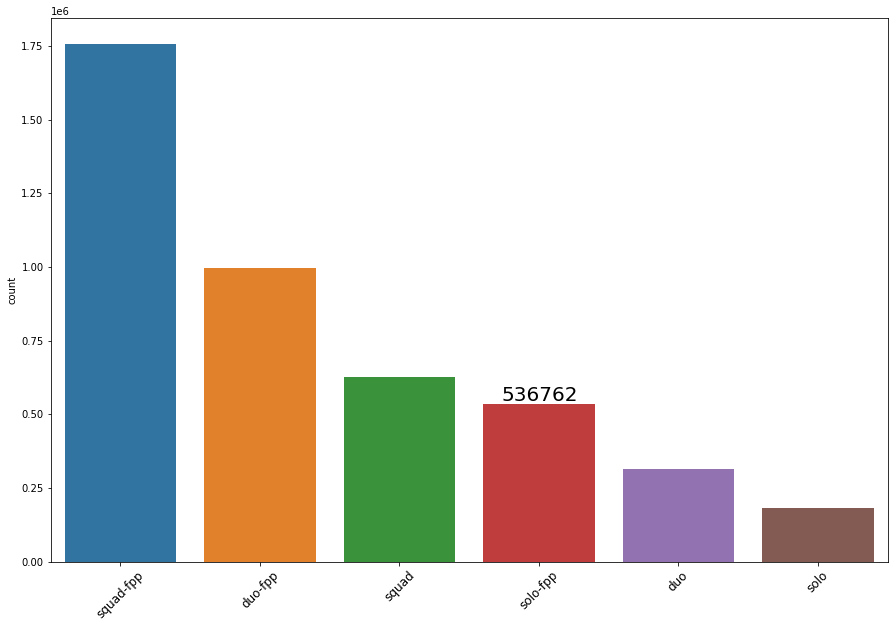

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
g = sns.barplot(data = match_type, x = match_type.index, y = "count")
ax = g
plt.text(2.73, 545000, '536762', fontsize= 20)

plt.xticks(fontsize=12, rotation=45)
plt.show()

* 약 53만개의 데이터를 가지고 있는 3인칭 solo-fpp 매치 타입의 순위 예측을 하기로 결정

### 2-2 match type이 solo-fpp인 데이터만 남기기

In [11]:
df_solo = df[df['matchType'] == 'solo-fpp'].reset_index(drop = True)
df_solo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
2,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
4,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


### 2-3 train data / validation data / test data 분리

In [33]:
from sklearn.model_selection import train_test_split

def data_divided(df):
  train, test = train_test_split(df, test_size=0.15, random_state=1)
  train, val = train_test_split(train, test_size=0.15, random_state=1)
  return train, test, val

In [34]:
train, test, val = data_divided(df_solo)
print(train.shape, test.shape, val.shape)

(387809, 29) (80515, 29) (68437, 29)


### 2-4 EDA

In [35]:
import numpy as np

def eda_process(df):
  df = df.drop(['Id', 'groupId', 'matchId', 'assists', 'DBNOs', 'matchType', 'numGroups', 'revives', 'teamKills'], axis = 1)   # 필요없는 컬럼 삭제
  df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']   # 총 이동거리 컬럼 추가(m 단위)
  df['headshotKillsPerKills'] = np.where(df["kills"].values == 0 , -1, round(df['headshotKills']/df['kills'],4))  # 킬중에서 헤드샷 킬의 비율(킬이 없으면 -1)
  df['useCar'] = np.where(df['rideDistance'] != 0, '1', '0') # 차를 사용했으면 1, 차를 사용하지 않았으면 0  
  
  # 매치의 플레이어 수가 90이하인 매치 삭제
  indexNames = df[df['maxPlace'] <= 90].index
  df.drop(indexNames, inplace = True)
  df.reset_index(drop = True)

  df['winPlacePerc'] = np.where(df['winPlacePerc'] < 0.9, 0, 1)   # 상위 10% 안에 들었으면 1, 상위 10%안에 들지 못했으면 0으로 변경
  return df

In [36]:
train = eda_process(train)
test = eda_process(test)
val = eda_process(val)

In [37]:
print(train.shape, test.shape, val.shape)

(363234, 23) (75317, 23) (64169, 23)


In [65]:

def divide_X_y(df):
  target = 'winPlacePerc'
  # features = ['boosts', 'damageDealt', 'headshotKills', 'heals', 'killPlace',
  #      'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
  #      'maxPlace', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
  #      'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
  #      'totalDistance', 'headshotKillsPerKills', 'useCar']
  features = ['boosts', 'damageDealt', 'heals', 'killPlace',
       'kills', 'matchDuration', 'maxPlace', 'roadKills',
       'vehicleDestroys', 'weaponsAcquired', 
       'totalDistance', 'headshotKillsPerKills', 'useCar']
  
  X = df[features]
  y = df[target]
  return X, y

In [66]:
X_train, y_train = divide_X_y(train)
X_test, y_test = divide_X_y(test)
X_val, y_val = divide_X_y(val)

In [67]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(363234, 10) (363234,)
(75317, 10) (75317,)
(64169, 10) (64169,)


# 3. 모델 학습

In [41]:
# !pip install category_encoders

In [58]:
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## 3-1. 기준모델

In [49]:
y_test.value_counts()

0    67559
1     7758
Name: winPlacePerc, dtype: int64

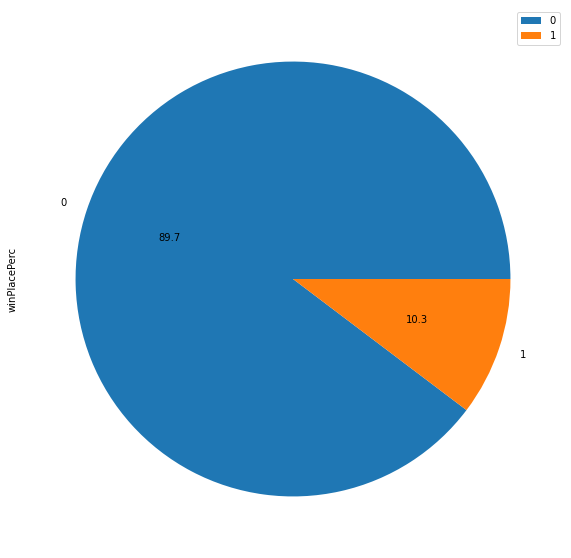

In [51]:
y_test.value_counts().plot.pie(y='target', legend='True', autopct='%.1f', figsize=(10, 10));

In [44]:
pred = np.array([y_train.value_counts().index[0]]*len(y_test))  # 기준 모델

In [45]:
print('기준모델 정확도:', accuracy_score(y_test, pred))

기준모델 정확도: 0.896995366251975


## 3-2. Decision Tree

In [68]:
pipe_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe_dt.fit(X_train, y_train)
pred_dt_val = pipe_dt.predict(X_val)

print('검증데이터 정확도:', accuracy_score(y_val, pred_dt_val))
print('검증데이터 precision: ', precision_score(y_val, pred_dt_val))
print('검증데이터 recall: ', recall_score(y_val, pred_dt_val))
print('검증데이터 f1_score:', f1_score(y_val, pred_dt_val)) 

검증데이터 정확도: 0.9248858483068149
검증데이터 precision:  0.6543557469360716
검증데이터 recall:  0.5911131059245961
검증데이터 f1_score: 0.6211287533406697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


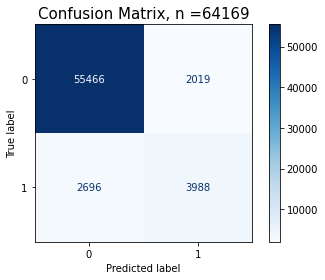

In [53]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_dt, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.title(f'Confusion Matrix, n ={len(y_val)}', fontsize = 15)
plt.show()

## 3-3. Random Forest

In [62]:
pipe_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_rf.fit(X_train, y_train)
pred_rf_val = pipe_rf.predict(X_val)

print('검증데이터 정확도:', accuracy_score(y_val, pred_rf_val))
print('검증데이터 precision: ', precision_score(y_val, pred_rf_val))
print('검증데이터 recall: ', recall_score(y_val, pred_rf_val))
print('검증데이터 f1_score:', f1_score(y_val, pred_rf_val))

검증데이터 정확도: 0.9369009958079446
검증데이터 precision:  0.731750219876869
검증데이터 recall:  0.6223818073010173
검증데이터 f1_score: 0.672649365348856


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


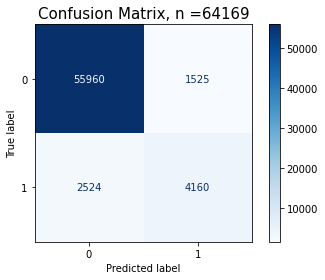

In [55]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_rf, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.title(f'Confusion Matrix, n ={len(y_val)}', fontsize = 15)
plt.show()

## 3-4. 모델 선택 및 테스트

* Decision Tree 보다 RandomForest가 f1-score가 더 높아 RandomForest 모델을 선택하였다.

In [64]:
pred_test = pipe_rf.predict(X_test)

print('테스트 데이터 정확도:', accuracy_score(y_test, pred_test))
print('테스트데이터 precision: ', precision_score(y_test, pred_test))
print('테스트데이터 recall: ', recall_score(y_test, pred_test))
print('테스트 데이터 f1_score:', f1_score(y_test, pred_test))

테스트 데이터 정확도: 0.9381149010183624
테스트데이터 precision:  0.7400403038288638
테스트데이터 recall:  0.6153647847383347
테스트 데이터 f1_score: 0.6719684706875924


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


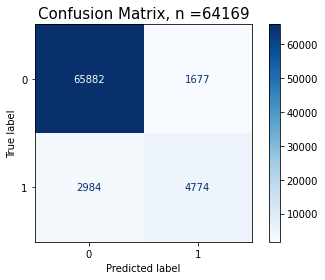

In [57]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_rf, X_test, y_test, cmap = plt.cm.Blues, ax=ax)
plt.title(f'Confusion Matrix, n ={len(y_val)}', fontsize = 15)
plt.show()

# 4. 모델 해석

In [ ]:
pip install pdpbox

     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 22.2 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=3238ca58c52455ba14cdf42f4d56b1dac5ae651cc7b78bf0702987f6b32989b8
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

## 4-1. 총 피해량과 target값과의 관계

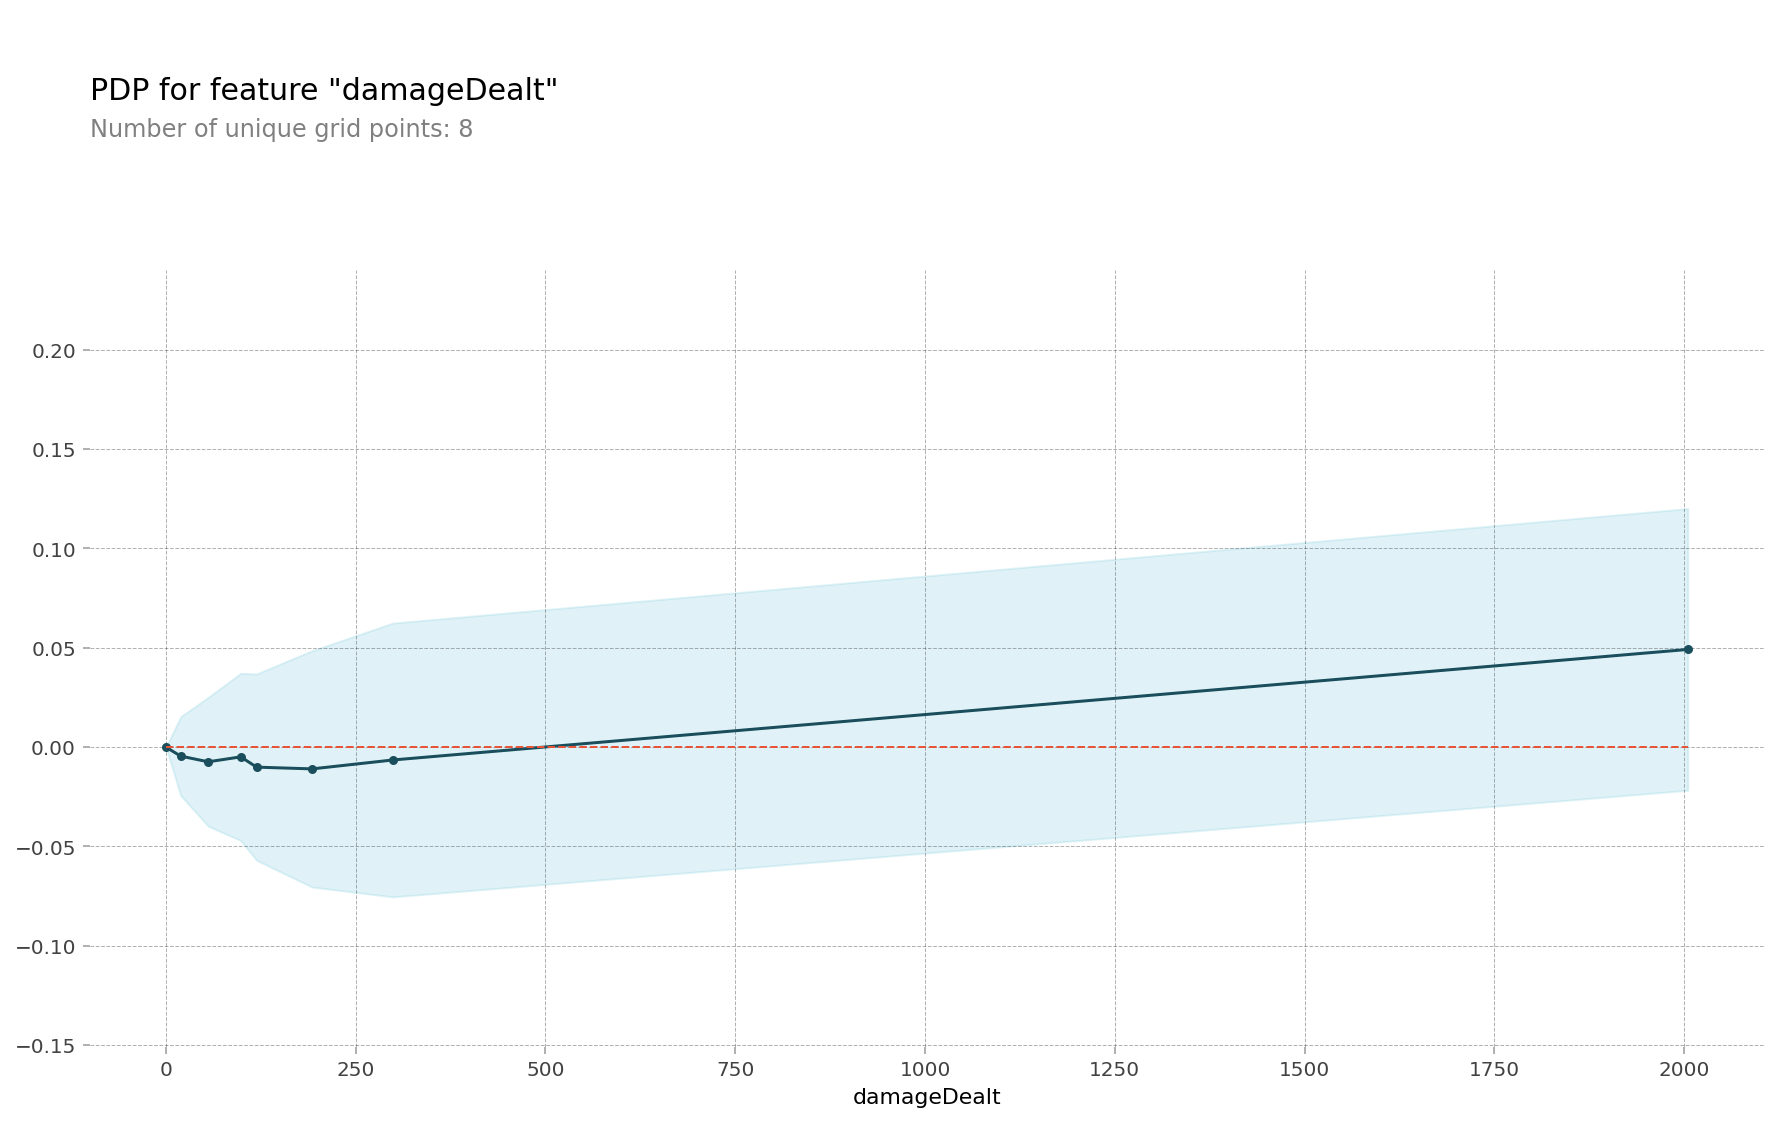

In [ ]:
feature = 'damageDealt'
isolated = pdp_isolate(
    model= pipe_rf, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

* 총 피해량이 높아질수록 상위 10% 안에 들어갈 가능성이 높다.

## 4-2. 총 이동거리와 target값과의 관계

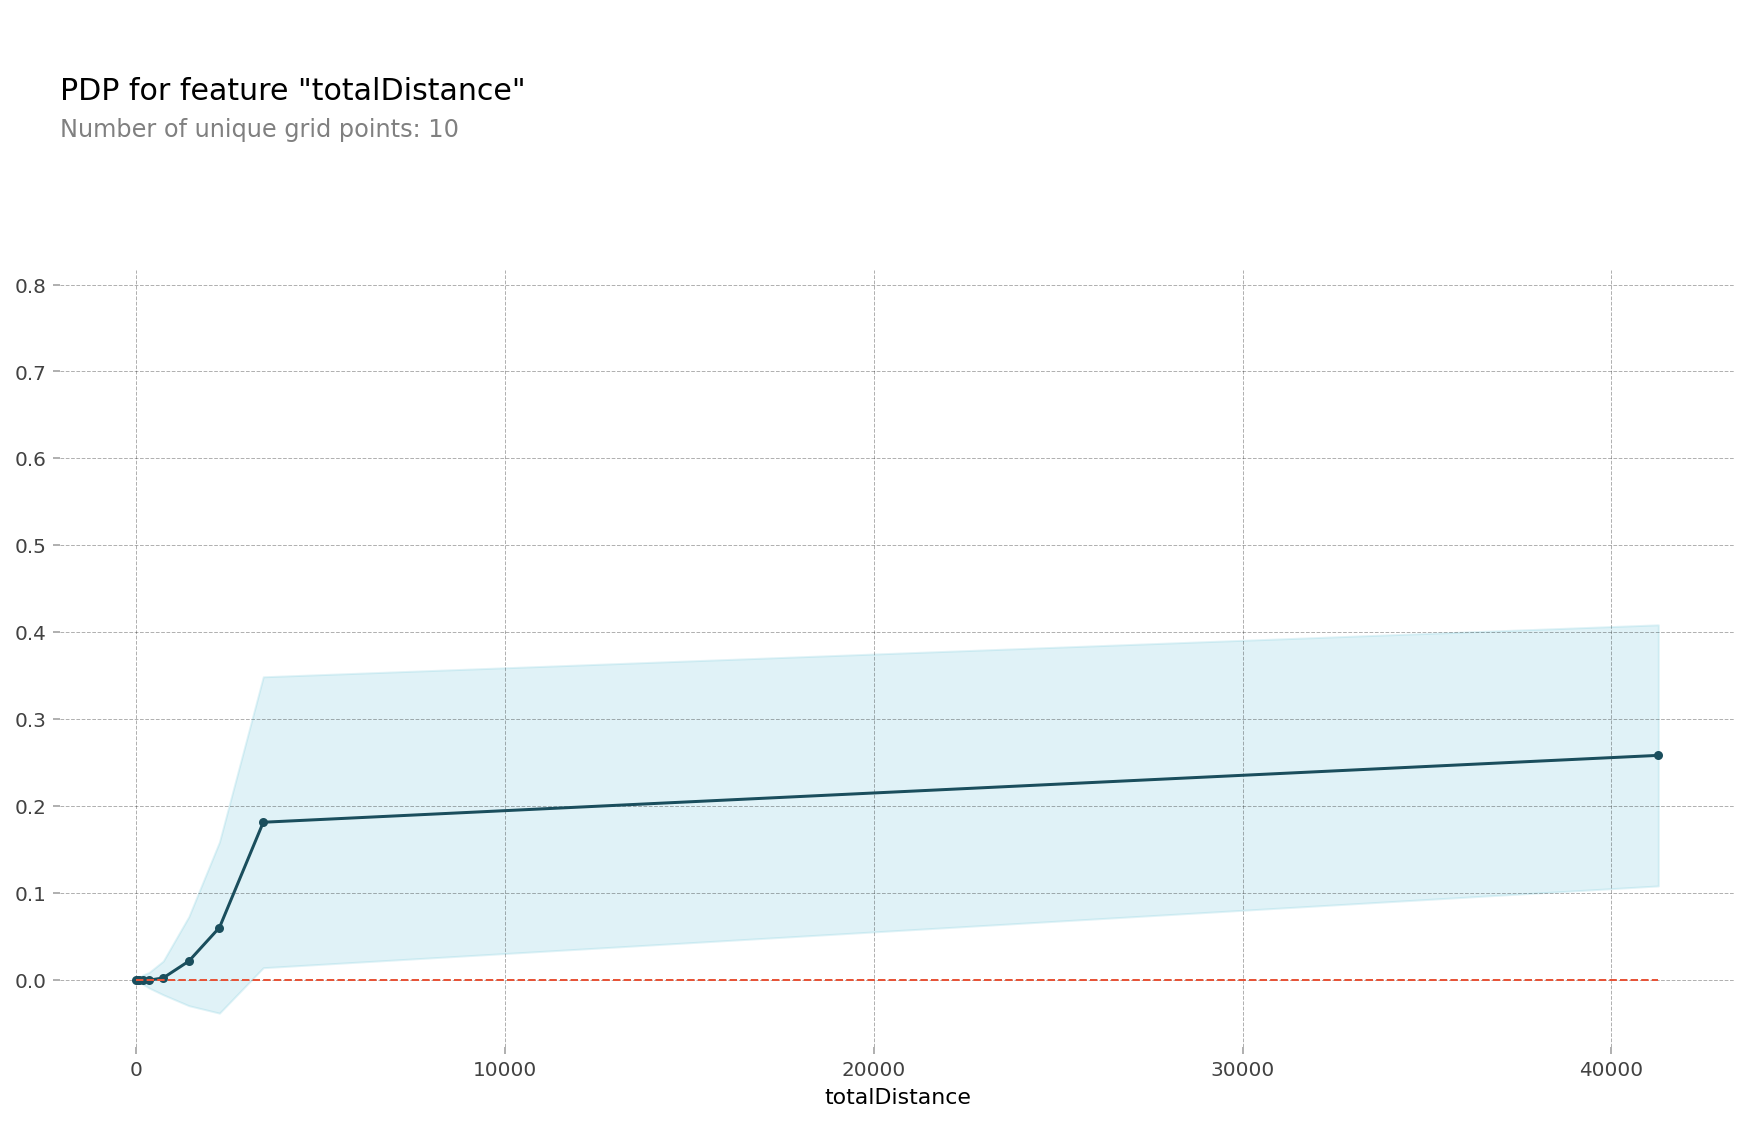

In [ ]:
feature = 'totalDistance'
isolated = pdp_isolate(
    model= pipe_rf, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

* 총 이동거리가 늘어날수록 상위 10% 안에 들어갈 가능성이 높다.